## Analisis de Biodiversidad en Parques Nacionales USA

**Fuentes de información:**
 `Observations.csv` y `Species_info.csv`

El objetivo del proyectos es Limpiar y Estudiar la data de especies animales en diveros parques nacionales de Estados Unidos, para encontrar información relevante oculta en los distintos datasets

In [1]:
## Importar los modulos correspondientes para analisis de datos

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns



In [2]:
## cargar datos de Species_info, y comenzar analisis general

species = pd.read_csv("Species_info.csv")
species.head(10)


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [3]:
species.tail(10)

,category,scientific_name,common_names,conservation_status
5814,Vascular Plant,Cuscuta suksdorfii,Mountain Dodder,NaN
5815,Vascular Plant,Datura wrightii,"Sacred Datura, Sacred Thornapple, Sacred Thorn...",NaN
5816,Vascular Plant,Nicotiana acuminata var. multiflora,Manyflower Tobacco,NaN
5817,Vascular Plant,Nicotiana attenuata,"Coyote Tabacco, Coyote Tobacco",NaN
5818,Vascular Plant,Solanum americanum,"American Black Nightshade, Common Purple Night...",NaN
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN
5823,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN


In [4]:
## Cargar datos de Observations y comenzar analisis general

observations = pd.read_csv('Observations.csv')
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [5]:
observations.tail(10)

,scientific_name,park_name,observations
23286,Symphyotrichum frondosum,Bryce National Park,101
23287,Sasa palmata,Yellowstone National Park,210
23288,Amaranthus hybridus,Great Smoky Mountains National Park,65
23289,Potentilla flabellifolia,Yellowstone National Park,246
23290,Triodanis perfoliata var. perfoliata,Yellowstone National Park,262
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171
23295,Cucurbita pepo,Yosemite National Park,164


In [6]:
## mirar las dimensiones de ambos CSV
print(f"species: {species.shape}")
print(f"observations: {observations.shape}")

species: (5824, 4)
observations: (23296, 3)


In [7]:
## numero de especies unicas, y categorias o reinos
print(f"Número de especies: {species.scientific_name.nunique()}")
print(f"Número de categorias de especies: {species.category.nunique()}")
print(f"Categorias de especies: {species.category.unique()}")

Número de especies: 5541
Número de categorias de especies: 7
Categorias de especies: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
## exploración de la columna conservation status
print(f"Número de estados de conservación:{species.conservation_status.nunique()}")
print(f"Estados de conservación:{species.conservation_status.unique()}")

## cantidad de observaciones por estado de conservación
print(species.groupby("conservation_status").size())
## cantidad de nan
print(f"nan: {species.conservation_status.isna().sum()}")


Número de estados de conservación:4
Estados de conservación:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64
nan: 5633


In [9]:
## reemplazar valores nan para poder continuar con cualquier operación númerica relevante 
species.conservation_status.fillna("w/intervention", inplace = True)
species.groupby("conservation_status").size()

conservation_status
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
w/intervention        5633
dtype: int64

In [10]:
## explorar observations
## cantidad única y lista de parques nacionales

print(f"Número de parques nacionales: {observations.park_name.nunique()}")
print(f"Listado de parques nacionales: {observations.park_name.unique()}")

Número de parques nacionales: 4
Listado de parques nacionales: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [11]:
## cantidad total de avistamientos 
print(f"total de avistamientos: {observations.observations.sum()}")
print("avistamientos por parque nacional")
observations.groupby("park_name")['observations'].sum()

total de avistamientos: 3314739
avistamientos por parque nacional


park_name
Bryce National Park                     576025
Great Smoky Mountains National Park     431820
Yellowstone National Park              1443562
Yosemite National Park                  863332
Name: observations, dtype: int64

## Inicio de Analisis detallado


In [12]:
## observar el estado de conservación agrupado por cada categoria de especie

conservation_by_category = species[species.conservation_status != "w/intervention"].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()

conservation_by_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0, 0.5, 'number of species')

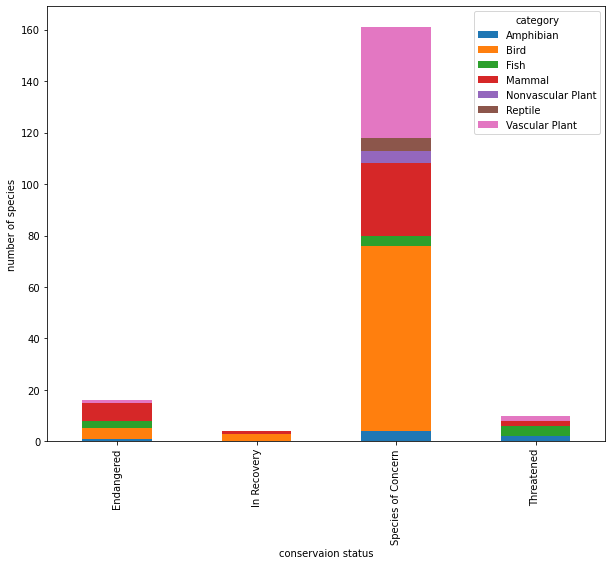

In [13]:
## observar en gráfico

ax = conservation_by_category.plot(kind = 'bar', figsize=(10,8), stacked = True)
ax.set_xlabel("conservaion status")
ax.set_ylabel("number of species")

In [14]:
## ¿ hay algún tipo de especie con mayor chance de estar en peligro?

## agregar columna nueva a df para identificar facilmente especies en peligro

species['is_protected'] = species.conservation_status != 'w/intervention'
species['protection_status'] = species['is_protected'].apply(lambda x: "protected" if x ==  True else "not protected" )




In [15]:
## nueva dataframe para simplificar el analisis

category_counts = species.groupby(['category', 'is_protected'])['scientific_name'].nunique().reset_index().pivot(columns = 'is_protected', index = 'category', values = 'scientific_name').reset_index()

category_counts.columns = ['category', 'not_protected', 'protected']
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [16]:
## crear columna con porcentajes para observar en terminos relativos y facilitar conclusiones
category_counts['percent_protected'] = category_counts.protected / (category_counts.protected + category_counts.not_protected) * 100

category_counts

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [17]:
## crear df con forma optima para la función crosstab y luego poder realizar multiples test chi2


df_mammal_bird = species[(species['category'] == 'Mammal') | (species['category'] == 'Bird')][["category","protection_status"]].reset_index(drop=True)
df_mammal_reptile = species[(species['category'] == 'Mammal') | (species['category'] == 'Reptile')][["category","protection_status"]].reset_index(drop=True)

df_mammal_fish = species[(species['category'] == 'Mammal') | (species['category'] == 'Fish')][["category","protection_status"]].reset_index(drop=True)

df_mammal_amphibian = species[(species['category'] == 'Mammal') | (species['category'] == 'Amphibian')][["category","protection_status"]].reset_index(drop=True)


In [18]:
## creación de crosstabs con varios pares de especies

cross_mammal_birds = pd.crosstab(df_mammal_bird.category, df_mammal_bird.protection_status)
cross_mammal_reptile = pd.crosstab(df_mammal_reptile.category, df_mammal_reptile.protection_status)
cross_mammal_fish = pd.crosstab(df_mammal_fish.category, df_mammal_fish.protection_status)
cross_mammal_amphibian = pd.crosstab(df_mammal_amphibian.category, df_mammal_amphibian.protection_status)

##tabla comparativa mamiferos y aves
cross_mammal_birds




protection_status,not protected,protected
category,,
Bird,442,79
Mammal,176,38


In [19]:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(cross_mammal_birds)
print(f"pval : {pval}")

## valor de estadistica p para verificar si la diferencia es estadisticamente significativa. En este caso no lo es.

pval : 0.445901703047197


In [20]:
##tabla comparativa mamiferos y reptiles
cross_mammal_reptile


protection_status,not protected,protected
category,,
Mammal,176,38
Reptile,74,5


In [21]:

chi2, pval, dof, expected = chi2_contingency(cross_mammal_reptile)
print(f"pval : {pval}")
## valor de estadistica p para verificar si la diferencia es estadisticamente significativa. En este caso si lo es.


pval : 0.02338465214871547


In [22]:
##tabla comparativa mamiferos y reptiles
cross_mammal_fish

protection_status,not protected,protected
category,,
Fish,116,11
Mammal,176,38


In [23]:
chi2, pval, dof, expected = chi2_contingency(cross_mammal_fish)
print(f"pval : {pval}")
## valor de estadistica p para verificar si la diferencia es estadisticamente significativa. En este caso si lo es.


pval : 0.031145264082780604


In [24]:
##tabla comparativa mamiferos y reptiles
cross_mammal_amphibian


protection_status,not protected,protected
category,,
Amphibian,73,7
Mammal,176,38


In [25]:
chi2, pval, dof, expected = chi2_contingency(cross_mammal_fish)
print(f"pval : {pval}")
## valor de estadistica p para verificar si la diferencia es estadisticamente significativa. En este caso si lo es.

pval : 0.031145264082780604


## Interpretación de los resultados chi2

en casos donde el valor p es menor a 5%, se puede determinar que existe una diferencia estadisticamente significativa entre las variables observadas

es por eso que podemos concluir que los mamiferos tienen una mayor necesidad de protección que los reptiles, anfibios y peces; pero no que las aves, lo que puede indicar que ambas categorias tienden a estar en mayor peligro que el resto

# Analisis de especies relevantes

El siguiente paso es intentar encontrar las especies más recurrentes en el dataset, y luego determinar el lugar y estatus de protección de las mismas


In [26]:
## dataframe con los nombres comunes de especies mamiferas
## se convierte a una lista para luego poder aplicar tecnincas de procesamiento de lenguaje

names = species[species.category == 'Mammal']['common_names']
names_list = names.values.tolist()
print(names_list)

["Gapper's Red-Backed Vole", 'American Bison, Bison', 'Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle', 'Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)', 'Wapiti Or Elk', 'White-Tailed Deer', 'Feral Hog, Wild Pig', 'Coyote', 'Gray Wolf', 'Red Wolf', 'Common Gray Fox, Gray Fox', 'Black Fox, Cross Fox, Red Fox, Silver Fox', 'Red Fox', 'Mountain Lion', 'Wild Cat, Wildcat', 'Bobcat', 'Panther (Mountain Lion)', 'Striped Skunk', 'Eastern Spotted Skunk', 'River Otter', 'Northern River Otter', 'Fisher', 'Mink (Or Weasel)', 'Long-Tailed Weasel', 'Least Weasel', 'Mink', 'Common Raccoon, Raccoon', 'Black Bear', "Rafinesque's Big-Eared Bat", 'Big Brown Bat', 'Silver-Haired Bat', 'Eastern Red Bat, Red Bat', 'Hoary Bat', 'Mississippi Myotis, Southeastern Myotis', 'Gray Myotis', "Keen's Myotis", 'Eastern Small-Footed Bat, Eastern Small-Footed Myotis', 'Little Brown Bat, Little Brown Myotis', 'Northern Long-Eared Bat, Northern Myotis', 'Indiana Bat, Indiana Or Social Myotis', 'Eveni

In [27]:
## proceso para tokenizar strings y separalas en componentes individuales
from nltk.tokenize import word_tokenize
tokenized_names = [word_tokenize(i) for i in names_list]

tokens = []
for line in tokenized_names:
    for element in line:
        tokens.append(element)

print(tokens)
        

['Gapper', "'s", 'Red-Backed', 'Vole', 'American', 'Bison', ',', 'Bison', 'Aurochs', ',', 'Aurochs', ',', 'Domestic', 'Cattle', '(', 'Feral', ')', ',', 'Domesticated', 'Cattle', 'Domestic', 'Sheep', ',', 'Mouflon', ',', 'Red', 'Sheep', ',', 'Sheep', '(', 'Feral', ')', 'Wapiti', 'Or', 'Elk', 'White-Tailed', 'Deer', 'Feral', 'Hog', ',', 'Wild', 'Pig', 'Coyote', 'Gray', 'Wolf', 'Red', 'Wolf', 'Common', 'Gray', 'Fox', ',', 'Gray', 'Fox', 'Black', 'Fox', ',', 'Cross', 'Fox', ',', 'Red', 'Fox', ',', 'Silver', 'Fox', 'Red', 'Fox', 'Mountain', 'Lion', 'Wild', 'Cat', ',', 'Wildcat', 'Bobcat', 'Panther', '(', 'Mountain', 'Lion', ')', 'Striped', 'Skunk', 'Eastern', 'Spotted', 'Skunk', 'River', 'Otter', 'Northern', 'River', 'Otter', 'Fisher', 'Mink', '(', 'Or', 'Weasel', ')', 'Long-Tailed', 'Weasel', 'Least', 'Weasel', 'Mink', 'Common', 'Raccoon', ',', 'Raccoon', 'Black', 'Bear', 'Rafinesque', "'s", 'Big-Eared', 'Bat', 'Big', 'Brown', 'Bat', 'Silver-Haired', 'Bat', 'Eastern', 'Red', 'Bat', ',', 'R

In [28]:
## importar y crear objeto Counter para obtener las ocurrencias más comunes en el texto
## contador de tokens para identificar strings más comunes en el dataset
from collections import Counter

counter = Counter(tokens)
 
print(counter.most_common(100))

[(',', 98), ('Bat', 35), ('Shrew', 28), ('Myotis', 26), ('Mouse', 17), ('Squirrel', 15), ("'s", 14), ('Vole', 14), ('Chipmunk', 14), ('Western', 13), ('American', 12), ('Mountain', 12), ('Eastern', 12), ('Fox', 11), ('Northern', 11), ('Gray', 10), ('Brown', 10), ('Red', 9), ('Big-Eared', 8), ('Deer', 7), ('Common', 7), ('California', 7), ('Sheep', 6), ('White-Tailed', 6), ('Wolf', 6), ('Raccoon', 6), ('Bear', 6), ('Small-Footed', 6), ('Little', 6), ('Woodrat', 6), ('(', 5), ('Feral', 5), (')', 5), ('Black', 5), ('Spotted', 5), ('Mink', 5), ('Long-Tailed', 5), ('Long-Eared', 5), ('Cottontail', 5), ('Beaver', 5), ('Southern', 5), ('Water', 5), ('Ground', 5), ('Or', 4), ('Wild', 4), ('Lion', 4), ('Skunk', 4), ('Weasel', 4), ('Least', 4), ('Rat', 4), ('Flying', 4), ('Mole', 4), ('Townsend', 4), ('Pocket', 4), ('Sierra', 4), ('Nevada', 4), ('Bison', 3), ('Elk', 3), ('Pig', 3), ('River', 3), ('Otter', 3), ('Big', 3), ('Silver-Haired', 3), ('Hoary', 3), ('Virginia', 3), ('Rock', 3), ('Meadow'

al parecer los murcielagos representan la mayor cantidad de especies individuales en el data set

In [29]:
## crear subset del dataset donde las filas correspondan a especies de murcielagos

species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
species.head(10)

,category,scientific_name,common_names,conservation_status,is_protected,protection_status,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,w/intervention,False,not protected,False
1,Mammal,Bos bison,"American Bison, Bison",w/intervention,False,not protected,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",w/intervention,False,not protected,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",w/intervention,False,not protected,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,w/intervention,False,not protected,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,w/intervention,False,not protected,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",w/intervention,False,not protected,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,protected,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,protected,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,protected,False


In [30]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,protection_status,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,w/intervention,False,not protected,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,protected,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,protected,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",w/intervention,False,not protected,True
32,Mammal,Lasiurus cinereus,Hoary Bat,w/intervention,False,not protected,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,protected,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,protected,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,protected,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,protected,True
40,Mammal,Nycticeius humeralis,Evening Bat,w/intervention,False,not protected,True


In [31]:
## merge de ambos datasets para observar los avistamientos de las diferentes especies de murcielago

bat_observations = observations.merge(species[species.is_bat])
bat_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,protection_status,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,protected,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,protected,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,protected,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,protected,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,w/intervention,False,not protected,True
...,...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,protected,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,protected,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,protected,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,protected,True


In [32]:
## agrupar la cantidad de avistamientos de murcielagos según parque nacional

bat_observations.groupby("park_name").observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [33]:
## incluir el estatus de protección en la agrupación

ob_by_park = bat_observations.groupby(["park_name", "protection_status"]).observations.sum().reset_index()
ob_by_park

,park_name,protection_status,observations
0,Bryce National Park,not protected,1596
1,Bryce National Park,protected,1837
2,Great Smoky Mountains National Park,not protected,1299
3,Great Smoky Mountains National Park,protected,1112
4,Yellowstone National Park,not protected,4044
5,Yellowstone National Park,protected,4318
6,Yosemite National Park,not protected,2345
7,Yosemite National Park,protected,2441


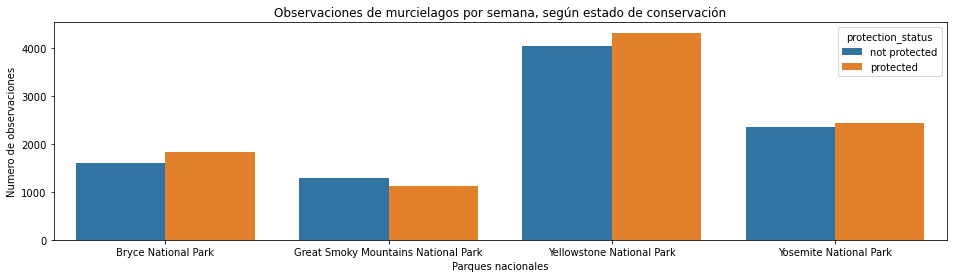

In [34]:
## visualización de los datos
plt.figure(figsize=(16, 4))
sns.barplot(x=ob_by_park.park_name, y= ob_by_park.observations, hue=ob_by_park.protection_status)
plt.xlabel('Parques nacionales')
plt.ylabel('Numero de observaciones')
plt.title('Observaciones de murcielagos por semana, según estado de conservación')
plt.show()

## Hallazgos y Conclusiones

1. La mayoria de las especies no estaban bajo estado de conservación
2. Los mamiferos y aves tienen el mayor porcentaje de especies bajo protección
3. Los mamiferos y aves tienen una diferencia estadisticamente significativa en comparación a otras categorias cuando se trata del porcentaje de especies bajo protección
4. El animal mamimefero más recurrente en este dataset es el murcielago, y se encuentra principalmente en el parque yellowstone, donde también se encuentra la mayor cantidad de observaciones de especies protegidas.